<a href="https://colab.research.google.com/github/stephenbrutch/Python-Machine-Learning-Tutorial-Codes/blob/main/01_neural_network_regression_with_tensorflow_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Introduction to regression with neural networks in Tensorflow. There are many definitions for a regression problem but in our case, we're going to simplify it:
1.   Predicting a numerical variable on some other combination of variables, even shorter... predicting a number essentially





In [ ]:
#Import tensorflow
import tensorflow as tf
print(tf.__version__)

2.12.0


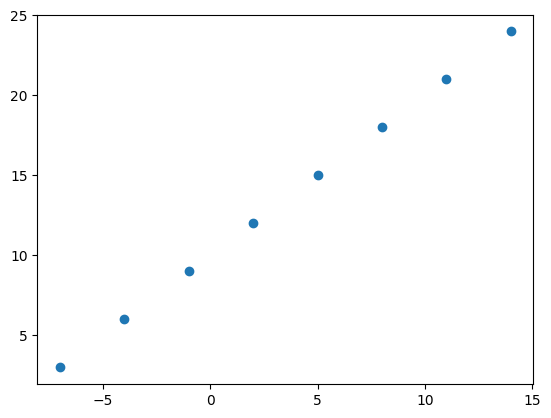

In [ ]:
#Creating a data to view and fit
import numpy as np
import matplotlib.pyplot as plt

#Create features
X=np.array([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0])

#Create labels
y=np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])

#Vizualize it
plt.scatter(X,y)

In [ ]:
y== X+10

array([ True,  True,  True,  True,  True,  True,  True,  True])

Input and output shapes

In [ ]:
#Create a demo tensor for our housing price prediction problem
house_info=tf.constant(["bedroom","bathroom","garage"])
house_price=tf.constant([939700])
house_info,house_price


(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
X[0],y[0]

(-7.0, 3.0)

In [ ]:
input_shape=X.shape
output_shape=y.shape
input_shape,output_shape

((8,), (8,))

In [ ]:
#Turn numpy arrays into tensors
X=tf.cast(tf.constant(X),dtype=tf.float32)
y=tf.cast(tf.constant(y),dtype=tf.float32)
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

Steps in modeling with TensorFlow
1. Creating a model- define the input and output layers as well as the hidden layers of a deep learning model.
2. Compiling a model- define the loss function(in other words, the function which tells our model how wrong it is) and the optimizer (which tells our model how to imporve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model)
3. Fitting a model- letting the model try to find patterns between X and y (features and labels)

In [ ]:
tf.random.set_seed(42)

#1. Create a model using the sequential API
model=tf.keras.Sequential([tf.keras.layers.Dense(1)])#using 1 because want model to take in 1 number and to predict 1 number

'''
#Can also add by:
model=tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))
model.add(tf.keras.layers.Dense(1))
'''



#2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"]) #mae for mean absolute error and sgd for stochastic gradient descent

#3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)


Epoch 1/5
1/1 [==============================] - 1s 590ms/step - loss: 15.1239 - mae: 15.1239
Epoch 2/5
1/1 [==============================] - 0s 10ms/step - loss: 14.8913 - mae: 14.8913
Epoch 3/5
1/1 [==============================] - 0s 10ms/step - loss: 14.7588 - mae: 14.7588
Epoch 4/5
1/1 [==============================] - 0s 8ms/step - loss: 14.6263 - mae: 14.6263
Epoch 5/5
1/1 [==============================] - 0s 9ms/step - loss: 14.4938 - mae: 14.4938


In [ ]:
#Checkout X and y
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
#Try and make a prediction of our trained model
y_pred=model.predict([17.0])
y_pred

1/1 [==============================] - 0s 99ms/step


array([[-4.3668475]], dtype=float32)

In [ ]:
y_pred-7.4

array([[-11.766848]], dtype=float32)

Improving our model. We can improve our model, by altering the steps we took to create a model.
1. Creating a model - here we might add more layers, increase the number of hidden units (all call neurons) within each of the hidden layers, change the activation function of each layer.
2. Compiling a model - here we might change the optimization function or perhaps the learning rate of the optimizer.
3. Fitting a model - here we might fit a model for more epochs(leave it training for longer) or on more data (give the model more example to learn from)

In [ ]:
#Lets rebuild our model

#1. Create the model
model=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

#3. Fit the model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)


Epoch 1/100
1/1 [==============================] - 0s 347ms/step - loss: 11.0550 - mae: 11.0550
Epoch 2/100
1/1 [==============================] - 0s 13ms/step - loss: 10.9225 - mae: 10.9225
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 10.7900 - mae: 10.7900
Epoch 4/100
1/1 [==============================] - 0s 12ms/step - loss: 10.6575 - mae: 10.6575
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 10.5250 - mae: 10.5250
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 10.3925 - mae: 10.3925
Epoch 7/100
1/1 [==============================] - 0s 12ms/step - loss: 10.2600 - mae: 10.2600
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 10.1275 - mae: 10.1275
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 9.9950 - mae: 9.9950
Epoch 10/100
1/1 [==============================] - 0s 8ms/step - loss: 9.8625 - mae: 9.8625
Epoch 11/100
1/1 [==============================] - 0s 9

In [ ]:
#Remind ourselves of the data
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
#Lets see our models prediction has improved
model.predict([17.0])

1/1 [==============================] - 0s 62ms/step


array([[29.953367]], dtype=float32)

In [ ]:
#Lets see if we can improve our model

#1. Create the model this time with an extra hidden layer with 100 neurons
model=tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(1)
])

#2. compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

#3. fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 474ms/step - loss: 13.3642 - mae: 13.3642
Epoch 2/100
1/1 [==============================] - 0s 9ms/step - loss: 12.7929 - mae: 12.7929
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 12.2171 - mae: 12.2171
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 11.6315 - mae: 11.6315
Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 11.0307 - mae: 11.0307
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 10.4101 - mae: 10.4101
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 9.7762 - mae: 9.7762
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 9.1251 - mae: 9.1251
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 8.4375 - mae: 8.4375
Epoch 10/100
1/1 [==============================] - 0s 8ms/step - loss: 7.7072 - mae: 7.7072
Epoch 11/100
1/1 [==============================] - 0s 9ms/step 

In [ ]:
 #Lets remind ourselves of the data
 X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
#Lets try to predict again
model.predict([17.0])


#mae is lower for this example but the predicted number is a worse prediction. Potential case of over fitting

1/1 [==============================] - 0s 70ms/step


array([[31.56533]], dtype=float32)

Common ways to improve a deep model (but doesnt always improve the predictive capabilities):
1. Adding layers
2. Increase the number of neurons in the hidden layers
3. Changing the activation function (relu,sigmoid...)
```
1) and 2) tf.keras.layers.Dense(50,activation="relu") ,50 corresponds to number of neurons, can have activation=none
```
4. Change the optimization function
5. Change the learning rate - can be most important hyperparamter to alter
```
#4) and 5) optimizer=tf.keras.optimizers.Adam(lr=0.01), 0.001 is the default learning rate for Adam
```
6. Fitting for longer (change epochs number)
7. Fitting on more data

Evaluating a model. A typical workflow of building neural networks is: build -> fit it -> evaluate it ->  tweak it -> fit it -> evaluate it -> repeat


When it comes to evaluation... there are 3 words you should memorize: vizualize visualize, visualize. Its a good idea to visualize:
* the data - what data are we working with? what does it look like/
* the model itself - what does our model look like?
* the training of a model - how does a model perform while it learns?
* the predictions of the modle - how do the predictions of model line up against the ground truth (the original labels)?





In [ ]:
#Make a bigger dataset
X=tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
#Make a labels for the dataset
y=X+10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

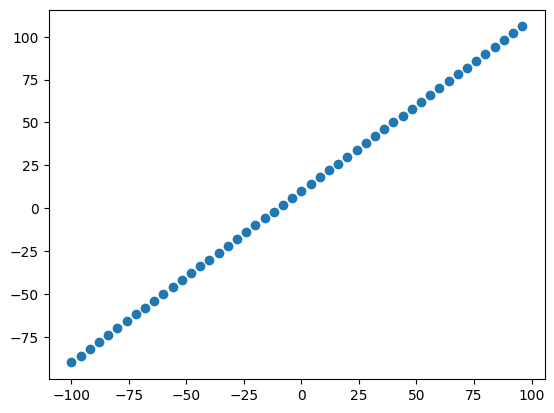

In [ ]:
#Visualize the data
import matplotlib.pyplot as plt
plt.scatter(X,y)

The 3 sets...
* Training set - the model learns from this data, which is typically 70-80% of the total data you have available
* Validation set - the model gets tuned on this data, which is typically 10-15% of the data available
* Test set - the model gets evaluated on this data to test what is has learned, this set is typically 10-15% of the total data available

In [ ]:
#Check the length of many samples we have
len(X)

50

In [ ]:
#Split the data into train and test sets
X_train=X[:40] #first 40 are training samples (80% of the data)
y_train=y[:40] #first 40 are training samples (80% of the data)

X_test=X[40:] #last 10 are testing samples (20% of the data)
y_test= y[40:] #last 10 are testing samples (20% of the data)

len(X_train),len(y_train),len(X_test),len(y_test)

(40, 40, 10, 10)

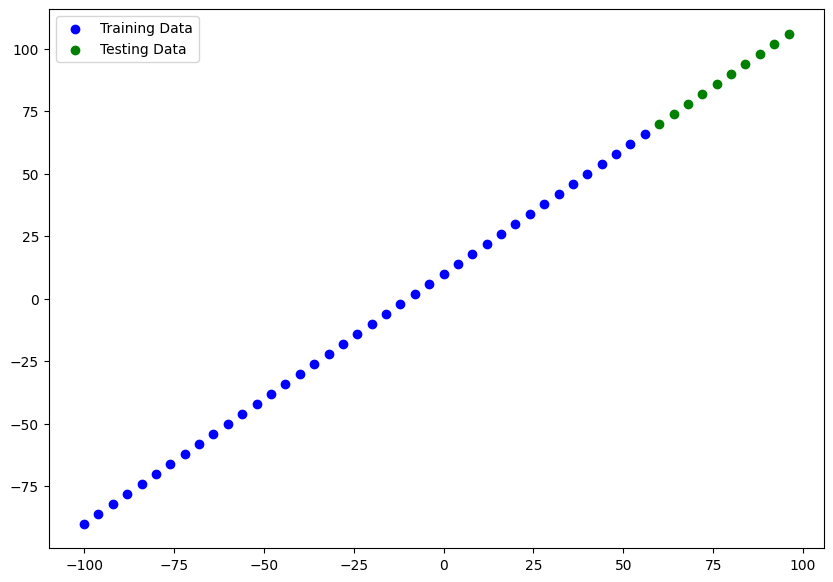

In [ ]:
#Visualizing the data

plt.figure(figsize=(10,7))

plt.scatter(X_train,y_train,c="b",label="Training Data")
plt.scatter(X_test,y_test,c="g",label="Testing Data")
plt.legend()

In [ ]:
#Lets have a look at building a neural network for our data

#1. Create the model
model=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

#3. Fit the model
#model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

----------------------------------
Model 1

In [ ]:
tf.random.set_seed(42)

#1 create the mode
model=tf.keras.Sequential([
    tf.keras.layers.Dense(10,input_shape=[1],name="input_layer"),
    tf.keras.layers.Dense(1,name="output_layer") #1 input for 1 output
],name="one_of_many_models_to_be_built")

#2 compile the model
model.compile(loss=tf.keras.losses.mae,
              #optimizer=tf.keras.optimizers.Adam(lr=0.1),
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

In [ ]:
model.summary()

Model: "one_of_many_models_to_be_built"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


* Total params=total number of paramters in the model
* Trainable params= these are the paramters (patterns) the model can update as it trains
* Non-trainable params= these paramters arent updated during training. (this is typical when you bring in already learn patterns or parameters from other models during transfer learning)

In [ ]:
#3 fit our model to the training data
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100,verbose=0)

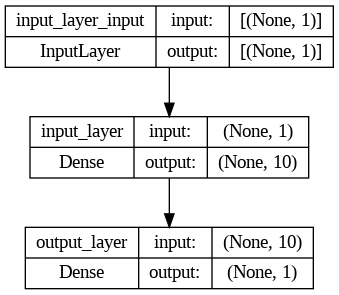

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model,show_shapes=True)

To visualize our model's predictions its a good idea to plot them against the true values

1/1 [==============================] - 0s 61ms/step


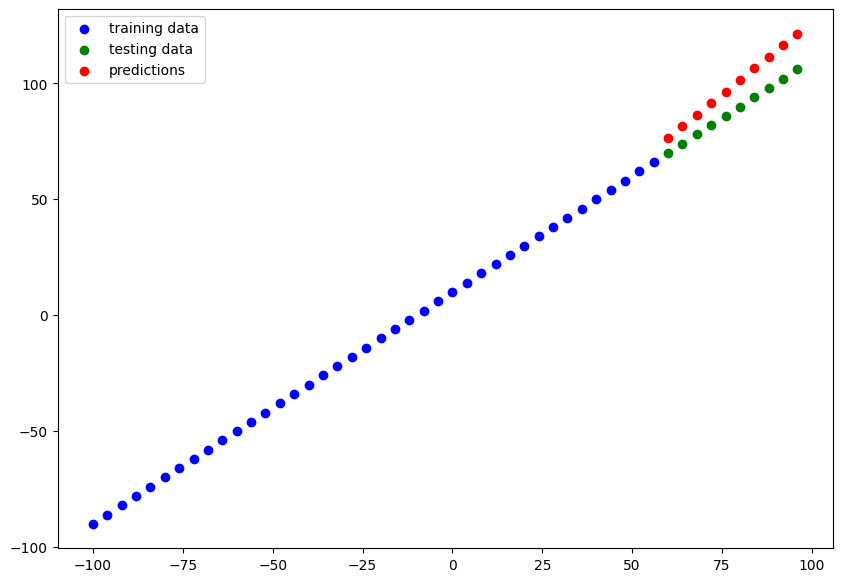

In [ ]:
#Make some predictions
y_pred=model.predict(X_test)
y_pred,y_test

'''
#Lets create a plotting function
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
'''

plt.figure(figsize=(10,7))
plt.scatter(X_train,y_train,c="b",label="training data")
plt.scatter(X_test,y_test,c="g",label="testing data")
plt.scatter(X_test,y_pred,c="r",label="predictions")
plt.legend()

Evaluating our models predictions with regression evaluation metrics
* depending on the problem youre working on, there will be different evaluation metrics to evaluate your models performance
* since were working on a regression, two of the main metrics are:
  * mae-mean absolute error
  * mse-mean square error

In [ ]:
#Evaluate the model on the test
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 218ms/step - loss: 10.9538 - mae: 10.9538


[10.953768730163574, 10.953768730163574]

In [ ]:
#just compare y_pred to y_test

#calculate the mean absolute error
mae=tf.metrics.mean_absolute_error(y_true=tf.constant(y_test),
                                   y_pred=tf.squeeze(tf.constant(y_pred))) #rework tensors so that mae returns 1 value.
mae #same value as model.evaluate above.

<tf.Tensor: shape=(), dtype=float32, numpy=10.953765>

In [ ]:
#calculate the mean squared error
mse=tf.metrics.mean_squared_error(y_true=y_test,
                                  y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=128.00075>

In [ ]:
#Make function to reuse mse mae
def mae(y_true,y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_true,
                                        y_pred=y_pred)
def mse(y_true,y_pred):
  return tf.metrics.mean_squared_error(y_true=y_true,
                                       y_pred=y_pred)


Running experiments to imrpve the model
* build, fit, eval, tweak it, repeat. do this by:
1. get more data-get more example for your model to train on
2. make your model larger/more complex-more layers,more neurons per hidden layer
3. train for longer-give your model more of a chance to find patterns in the data

Lets do 3 modeling experiments:
1. model_1 : same as the original model, 1 layer, trained for 100 epochs
2. model_2 : 2 layers, trained for 100 epochs
3. model_3 : 2 layers, trained for 500 epochs

Build model_1

In [ ]:
#set random seed
tf.random.set_seed(42)

#1 create the model
model_1=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2 compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])



In [ ]:
#3 fit the model
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100,verbose=0)

1/1 [==============================] - 0s 69ms/step


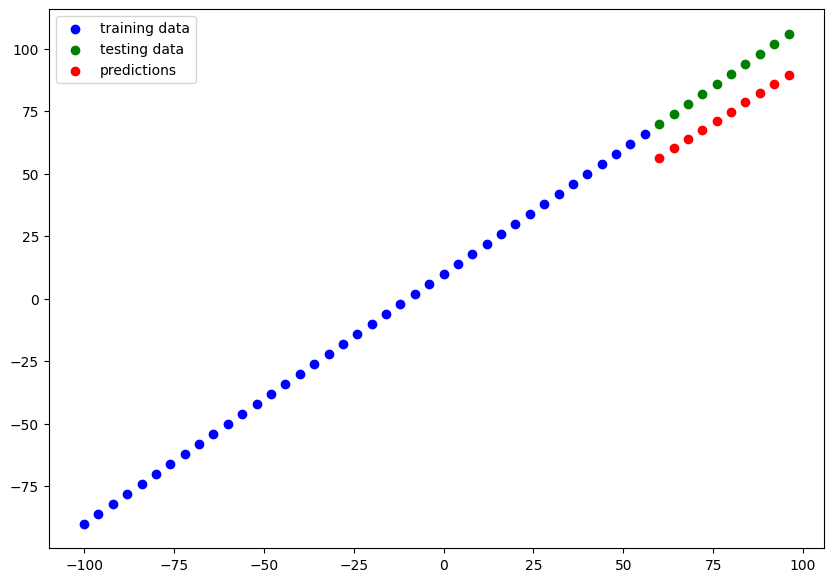

In [ ]:
#make and plot predictions for model_1
y_preds_1=model_1.predict(X_test)


plt.figure(figsize=(10,7))
plt.scatter(X_train,y_train,c="b",label="training data")
plt.scatter(X_test,y_test,c="g",label="testing data")
plt.scatter(X_test,y_preds_1,c="r",label="predictions")
plt.legend()



In [ ]:
#calculate model_1 evaluation
mae_1=tf.metrics.mean_absolute_error(y_true=y_test,
                                        y_pred=tf.squeeze(y_preds_1))
mse_1=tf.metrics.mean_squared_error(y_true=y_test,
                                       y_pred=tf.squeeze(y_preds_1))

mae_1,mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=14.933337>,
 <tf.Tensor: shape=(), dtype=float32, numpy=223.84502>)

Build model_2

In [ ]:
tf.random.set_seed(42)

#1 create the model
model_2=tf.keras.Sequential([
    tf.keras.layers.Dense(11),
    tf.keras.layers.Dense(1)
])

#2 compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])


In [ ]:
#3 fit the model
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100,verbose=0)

1/1 [==============================] - 0s 52ms/step


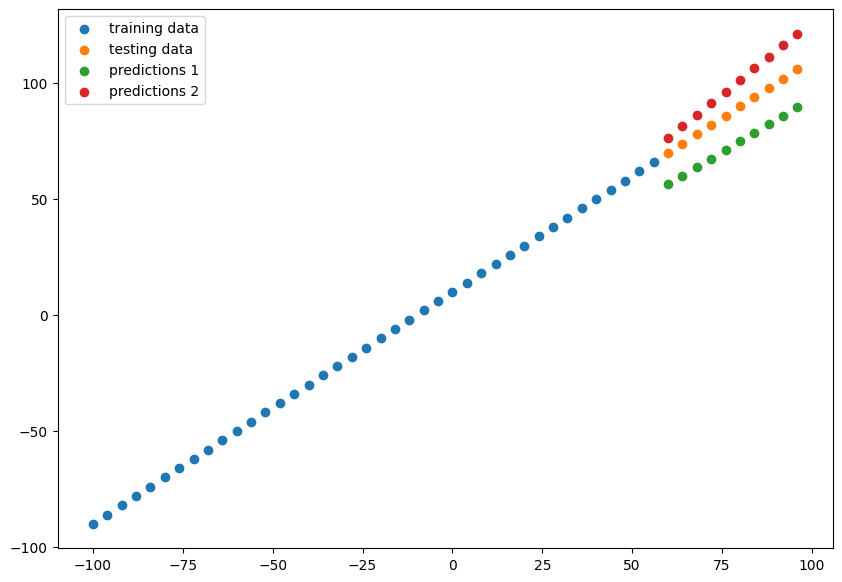

In [ ]:
#make and plot predictions for model_1
y_preds_2=model_2.predict(X_test)


plt.figure(figsize=(10,7))
plt.scatter(X_train,y_train,label="training data")
plt.scatter(X_test,y_test,label="testing data")
plt.scatter(X_test,y_preds_1,label="predictions 1")
plt.scatter(X_test,y_preds_2,label="predictions 2")
plt.legend()

In [ ]:
#calculate model_2 evaluation
mae_2=tf.metrics.mean_absolute_error(y_true=y_test,
                                        y_pred=tf.squeeze(y_preds_2))
mse_2=tf.metrics.mean_squared_error(y_true=y_test,
                                       y_pred=tf.squeeze(y_preds_2))

mae_2,mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=10.919024>,
 <tf.Tensor: shape=(), dtype=float32, numpy=127.21397>)

Build model_3

In [ ]:
#set random seed
tf.random.set_seed(42)

#1 create the model
model_3=tf.keras.Sequential([
    tf.keras.layers.Dense(11),
    tf.keras.layers.Dense(1)
])

#2 compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

In [ ]:
#3 fit the model
model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=250,verbose=0)

1/1 [==============================] - 0s 50ms/step


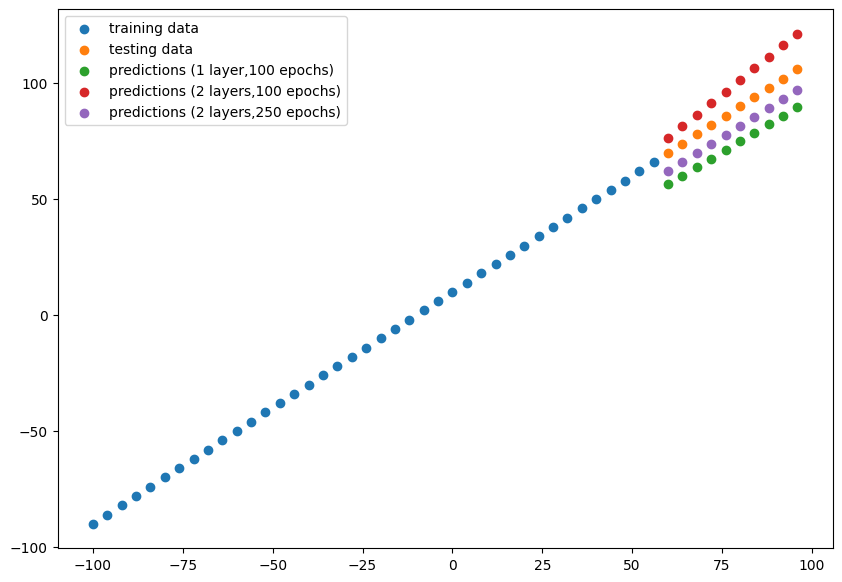

In [ ]:
#make and plot predictions for model_1
y_preds_3=model_3.predict(X_test)


plt.figure(figsize=(10,7))
plt.scatter(X_train,y_train,label="training data")
plt.scatter(X_test,y_test,label="testing data")
plt.scatter(X_test,y_preds_1,label="predictions (1 layer,100 epochs)")
plt.scatter(X_test,y_preds_2,label="predictions (2 layers,100 epochs)")
plt.scatter(X_test,y_preds_3,label="predictions (2 layers,250 epochs)")
plt.legend()

In [ ]:
#calculate model_3 evaluation
mae_3=tf.metrics.mean_absolute_error(y_true=y_test,
                                        y_pred=tf.squeeze(y_preds_3))
mse_3=tf.metrics.mean_squared_error(y_true=y_test,
                                       y_pred=tf.squeeze(y_preds_3))

mae_3,mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=8.243634>,
 <tf.Tensor: shape=(), dtype=float32, numpy=68.04004>)

Time to compare the results of the 3 models

In [ ]:
#Lets compare our models resuilts using a pandas dataframe
import pandas as pd
model_results=[["model_1",mae_1.numpy(),mse_1.numpy()],
               ["model_2",mae_2.numpy(),mse_2.numpy()],
               ["model_3",mae_3.numpy(),mse_3.numpy()]]
all_results=pd.DataFrame(model_results,columns=["model","mae","mse"])
all_results

,model,mae,mse
0,model_1,14.933337,223.845016
1,model_2,10.919024,127.213966
2,model_3,8.243634,68.040039


One of our main goals should be to minimize the time between your experiments. the more experiments you do the more things youll figure out which dont work and in turn, get closer to figuring out what does work. remember the machine learning practictioners motto: experiment, experiment, experiment

Tracking your experiments


One really good habit in machine learning modelling is to track the results of your experience

And when doing so, it can be tedious if youre running lots of experiments



Resource: As you build more models, youll want to look into using:

* tensorboard - a component of the tensorflow library to help track modelling experiments
* Weights & Biases - a tool for tracking all kinds of machine learning experiments (plus straight into tensorboard)

Saving our models

Saving them allows us to use them outside of google colab (or wherever they are trained) such as in a web application or mobile app

there are 2 main formats we can save our models too:
* the SavedModel format
* the HDF5 format

In [ ]:
model_3.save("best_model_SavedModel_format")

In [ ]:
#Save model using the hdf5 format
model_3.save("best_model_HDF5_format.h5")

Loading in a saved model

In [ ]:
#Load in SavedModel format model
loaded_SavedModel_format=tf.keras.models.load_model("/content/best_model_SavedModel_format")
loaded_SavedModel_format.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 11)                22        
                                                                 
 dense_9 (Dense)             (None, 1)                 12        
                                                                 
Total params: 34
Trainable params: 34
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_3.summary() #We can see the model and saved model loaded in is the same

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 11)                22        
                                                                 
 dense_9 (Dense)             (None, 1)                 12        
                                                                 
Total params: 34
Trainable params: 34
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Compare model 3 predictions and loaded model to see if
model_3_preds=model_3.predict(X_test)
loaded_SavedModel_format_preds=loaded_SavedModel_format.predict(X_test)
model_3_preds==loaded_SavedModel_format_preds

1/1 [==============================] - 0s 60ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [ ]:
#Load in .h5 format
loaded_h5_model=tf.keras.models.load_model("/content/best_model_HDF5_format.h5")
loaded_h5_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 11)                22        
                                                                 
 dense_9 (Dense)             (None, 1)                 12        
                                                                 
Total params: 34
Trainable params: 34
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_3.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 11)                22        
                                                                 
 dense_9 (Dense)             (None, 1)                 12        
                                                                 
Total params: 34
Trainable params: 34
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Compare .h5 format predictions to model 3 predictions
model_3_preds=model_3.predict(X_test)
loaded_h5_model_preds=loaded_h5_model.predict(X_test)
model_3_preds==loaded_h5_model_preds

1/1 [==============================] - 0s 67ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

How to downlaod a model (or any other file) from google colab

If you want to download your files from google colab:
* you can go to the files tab and right click on the file youre after and click download
* use code (see the cell below)
* save it to google drive by connecting google drive and copying it there (see 2nd cell below)


In [ ]:
#download a file from google colab
from google.colab import files
files.download("/content/best_model_HDF5_format.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#save a file from google colab to google drive. this requires mounting google drive
!cp /content/best_model_HDF5_format.h5 /content/drive/MyDrive/Tensorflow_Course

In [ ]:
!ls /content/drive/MyDrive/Tensorflow_Course

best_model_HDF5_format.h5


---------------------------------------------------------------

Taking a look at a larger example

In [ ]:
#import required libraries
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt


In [ ]:
#Read in insurance data
insurance=pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In table above we have numerical and non numerical data.

we have to create a numerical encoding -> one hot encoding

In [ ]:
#lets try to one hot encode our data frame so that it is all numbers
insurance_one_hot=pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [ ]:
#create X and y values (features and labels) method 1:
X=insurance_one_hot[['age','bmi','children','sex_female','sex_male','smoker_no','smoker_yes','region_northeast','region_northwest','region_southeast','region_southwest']]
y=insurance_one_hot[['charges']]


In [ ]:
#import the function to randombly split the dataset into training and test sets
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,
                                               test_size=0.2,
                                               random_state=22)

----------------------

In [ ]:
#create X and y values (features and labels) method 2:
X=insurance_one_hot.drop("charges",axis=1)
y=insurance_one_hot["charges"]

In [ ]:
#view X
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [ ]:
#view y
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [ ]:
#import the function to randombly split the dataframe into training and test sets
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,
                                               test_size=0.2,
                                               random_state=42)
len(X),len(X_train),len(X_test)

(1338, 1070, 268)

In [ ]:
0.2*1338

267.6

In [ ]:
#build a neural network (sort of like model_2,model_3 above)
tf.random.set_seed(42)

#1 create a model
insurance_model=tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#2 compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])

In [ ]:
#3 fit the model
insurance_model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 13215.8887 - mae: 13215.8887
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 12289.4297 - mae: 12289.4297
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 12171.8926 - mae: 12171.8926
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 12096.7305 - mae: 12096.7305
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 11981.3037 - mae: 11981.3037
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 11793.5625 - mae: 11793.5625
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 11465.7988 - mae: 11465.7988
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 10952.7109 - mae: 10952.7109
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 10336.0215 - mae: 10336.0215
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 9691.836

In [ ]:
#4 check the results of the insurance model on the test data
insurance_model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 3ms/step - loss: 8916.1562 - mae: 8916.1562


[8916.15625, 8916.15625]

In [ ]:
y_train.median(),y_train.mean(),


(9575.4421, 13346.089736364485)

very clear the model is not working/predicting well



To try and improve our model, we'll run 2 more experiments:
1. add an extra layer with more hidden units
2. train for longer
3. insert your own experiment here

In [ ]:
#set random seed
tf.random.set_seed(42)

#1 create the model
insurance_model_2=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#2 compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.SGD(),
                          metrics=["mae"])


In [ ]:
#3 fit the model
insurance_model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100,verbose=0)

In [ ]:
# evaluate the larger model
insurance_model_2.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 9944.7676 - mae: 9944.7676


[9944.767578125, 9944.767578125]

In [ ]:
# set random seed
tf.random.set_seed(42)

#1 create the model
insurance_model_3=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#2 compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

In [ ]:
#3 fit the model
history=insurance_model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 1s 2ms/step - loss: 13340.0449 - mae: 13340.0449
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 13320.0244 - mae: 13320.0244
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 13280.7275 - mae: 13280.7275
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 13206.3945 - mae: 13206.3945
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 13080.7842 - mae: 13080.7842
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 12892.1318 - mae: 12892.1318
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 12650.2910 - mae: 12650.2910
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 12391.5498 - mae: 12391.5498
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 12188.6279 - mae: 12188.6279
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 12109.33

In [ ]:
# evaluate our third model
insurance_model_3.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 8632.6074 - mae: 8632.6074


[8632.607421875, 8632.607421875]

In [ ]:
insurance_model_3.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 11, 100)           200       
                                                                 
 dense_16 (Dense)            (None, 11, 10)            1010      
                                                                 
 dense_17 (Dense)            (None, 11, 1)             11        
                                                                 
Total params: 1,221
Trainable params: 1,221
Non-trainable params: 0
_________________________________________________________________


In [ ]:
insurance_model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 8915.1445 - mae: 8915.1445


[8915.14453125, 8915.14453125]

Text(0.5, 0, 'epochs')

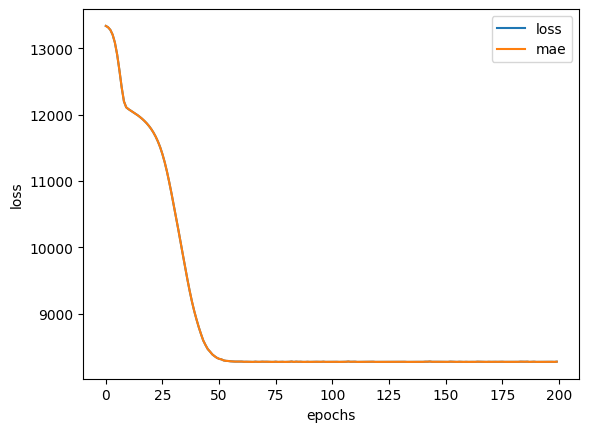

In [ ]:
#plot history (known as loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

How long you should train for???

Loss curve flattening out above... Why

Tensor flow as early stopping callback to solve the issue for how long to train

Preprocessing data (normalization and standardization)

In terms of scaling values, neural netoworks tend to prefer normalization. If not sure, can try both

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

#read in the insurance dataframe
insurance=pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")



,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


To prepare our data we can borrow a few classes from scikit learn:



In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder

#create a column transformer
ct=make_column_transformer(
    (MinMaxScaler(),["age","bmi","children"]),#turn all these columns into normalized=turn all between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"),["sex","smoker","region"])
 )

#Create our X and y values
X=insurance.drop("charges",axis=1)
y=insurance["charges"]

#build our train and test splits
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,
                                               test_size=0.2,
                                               random_state=42)

#fit our column transformer to our traiing data
ct.fit(X_train)

#transforming training and test data with normalization (minmaxscaler) and onehotencoder
X_train_normal=ct.transform(X_train)
X_test_normal=ct.transform(X_test)

In [ ]:
#what does our data look like now?
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [ ]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [ ]:
X_train.shape,X_train_normal.shape

((1070, 6), (1070, 11))

Now our data is normalized and one hot encoded. lets build our neural netowrk model to fit on our normalized data

In [ ]:
# set random seed
tf.random.set_seed(42)

#1 create the model
insurance_model_4=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#2 compile the model
insurance_model_4.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

#3 fit the model
insurance_model_4.fit(tf.expand_dims(X_train_normal, axis=-1), y_train, epochs=100)


Epoch 1/100
34/34 [==============================] - 2s 4ms/step - loss: 13345.4717 - mae: 13345.4717
Epoch 2/100
34/34 [==============================] - 0s 4ms/step - loss: 13342.7598 - mae: 13342.7598
Epoch 3/100
34/34 [==============================] - 0s 4ms/step - loss: 13336.5908 - mae: 13336.5908
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 13323.8018 - mae: 13323.8018
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 13300.8652 - mae: 13300.8652
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 13264.5146 - mae: 13264.5146
Epoch 7/100
34/34 [==============================] - 0s 4ms/step - loss: 13211.9346 - mae: 13211.9346
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 13140.4766 - mae: 13140.4766
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 13047.5049 - mae: 13047.5049
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 12930.51

In [ ]:
#evaluate our insurance model on normalized data
insurance_model_4.evaluate(X_test_normal,y_test)

9/9 [==============================] - 1s 5ms/step - loss: 8621.6914 - mae: 8621.6914


[8621.69140625, 8621.69140625]

In [ ]:
#build a neural network (practice)
tf.random.set_seed(42)

#find number of features
features=X_train_normal[0].shape

#1 create a model
insurance_model_5=tf.keras.Sequential([
    tf.keras.layers.Dense(10,input_shape=(features)),
    tf.keras.layers.Dense(1)
])

#2 compile the model
insurance_model_5.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])


In [ ]:
#3 fit the model
insurance_model_5.fit(tf.expand_dims(X_train_normal, axis=-1), y_train, epochs=100,verbose=0)

In [ ]:
insurance_model_5.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 10)                120       
                                                                 
 dense_19 (Dense)            (None, 1)                 11        
                                                                 
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________
